In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os

import re

%matplotlib inline

In [ ]:
dir = "./dataset/train/"

In [3]:
import os
files = os.listdir(dir)
len(files)

202

# Convert all xml into dataframe

In [4]:
record_text = []
record_id = []
record_tags = {}

In [5]:
tags = ['ABDOMINAL', 'ADVANCED-CAD', 'ALCOHOL-ABUSE', 'ASP-FOR-MI', 'CREATININE', \
        'DIETSUPP-2MOS', 'DRUG-ABUSE', 'ENGLISH', 'HBA1C', 'KETO-1YR',\
        'MAJOR-DIABETES', 'MAKES-DECISIONS', 'MI-6MOS']

In [6]:
for f in files:
    file = open(dir + f, "r")
    doc = xmltodict.parse(file.read())
    
    # log the file id
    record_id.append(os.path.basename(file.name)[:-4])
    
    # log the text
    record_text.append(doc['PatientMatching']['TEXT'])
    
    # log the tags
    labels = []
    for tag in tags:
        met = doc["PatientMatching"]["TAGS"][tag]['@met']
        
        temp = []
        if tag not in record_tags.keys():
            record_tags[tag] = temp
        else:
            temp = record_tags[tag]
            
        if met == "met":
            temp.append(1)
        else:
            temp.append(0)
            
    file.close()

In [7]:
len(record_tags)

13

### List to dataframe

In [8]:
records = record_tags.copy()
records['id'] = record_id
records['text'] = record_text

In [9]:
df = pd.DataFrame(records)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
ABDOMINAL          202 non-null int64
ADVANCED-CAD       202 non-null int64
ALCOHOL-ABUSE      202 non-null int64
ASP-FOR-MI         202 non-null int64
CREATININE         202 non-null int64
DIETSUPP-2MOS      202 non-null int64
DRUG-ABUSE         202 non-null int64
ENGLISH            202 non-null int64
HBA1C              202 non-null int64
KETO-1YR           202 non-null int64
MAJOR-DIABETES     202 non-null int64
MAKES-DECISIONS    202 non-null int64
MI-6MOS            202 non-null int64
id                 202 non-null object
text               202 non-null object
dtypes: int64(13), object(2)
memory usage: 23.8+ KB


In [11]:
df = df[['id', 'text', 'ABDOMINAL', 'ADVANCED-CAD', 'ALCOHOL-ABUSE', 'ASP-FOR-MI', 'CREATININE', \
        'DIETSUPP-2MOS', 'DRUG-ABUSE', 'ENGLISH', 'HBA1C', 'KETO-1YR',\
        'MAJOR-DIABETES', 'MAKES-DECISIONS', 'MI-6MOS']]

In [12]:
df.head()

,id,text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
0,162,Record date: 2068-02-04\n\nASSOCIATED ARTHRITI...,1,1,0,1,0,0,0,1,0,0,0,1,0
1,176,Record date: 2085-04-22\n\n \nThis patient wan...,1,0,1,0,0,1,0,1,0,0,0,1,0
2,189,Record date: 2090-07-07\n\nWillow Gardens Care...,0,1,0,1,1,1,0,1,1,0,1,1,0
3,214,Record date: 2096-07-15\n\n\n\nResults01/31/20...,0,1,0,1,0,1,0,0,1,0,0,1,1
4,200,Record date: 2170-02-17\n\n \n\nReason for Vis...,1,0,0,1,0,1,0,1,0,0,1,1,0


# Save data to CSV

In [13]:
df.to_csv("train.csv")

# Text Preprocessing

In [14]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
stemmer = SnowballStemmer("english")

In [132]:
def preprocessing(text):
    removelist = ['\n', '\t']
    tokens = word_tokenize(text.lower())
    processed = []
    for w in tokens:
        if w not in removelist:
            processed.append(stemmer.stem(w))
    res = ' '.join(processed)
    res = re.sub('[^a-z0-9]',' ',res)
    res = re.sub(r'\s+', ' ', res) #merge whitespace
    return res

In [129]:
df_train_text = df['text'].copy()
df_train_text.iloc[1]

'Record date: 2085-04-22\n\n \nThis patient wants to transfer his care from the McCook Erie Clinic to me. He \ngot \nmy name from a nurse who works in the hospital.  HE is a 58 year old white \nmale retired Transportation Manager with a number of issues.  \n1)  He had a cyst or a mass enlarge in his R submental region which was \nexcised \nat the McCook Erie Clinic.  Note from his surgeon there said the path showed \nnonkaziating granuloma.  I hope cultures are pending.  The patient does \nvolunteer at a homeless shelter so could  certainly be exposed to TB or \natypical mycobacteria.  \n2)  The patient has know mitral valve prolapse, mitral regurgitation followed \nat the MEC by a cardiologist. He had a stress test in the last year that was \nbenign. Never had CHF or endocarditis.  \n3)  Social situation.  The patient is a sober alcoholic and sober for the \nlast \n2 years however he went through divorce probably because of his alcoholism \n10 years ago and took early retirement from 

In [18]:
df_train_text.shape

(202,)

In [130]:
for i, text in enumerate(df_train_text):
    df_train_text.iloc[i] = preprocessing(text) 

In [131]:
df_train_text.iloc[1]

'record date 2085 04 22 this patient want to transfer his care from the mccook eri clinic to me he got my name from a nurs who work in the hospit he is a 58 year old white male retir transport manag with a number of issu 1 he had a cyst or a mass enlarg in his r subment region which was excis at the mccook eri clinic note from his surgeon there said the path show nonkazi granuloma i hope cultur are pend the patient doe volunt at a homeless shelter so could certain be expos to tb or atyp mycobacteria 2 the patient has know mitral valv prolaps mitral regurgit follow at the mec by a cardiologist he had a stress test in the last year that was benign never had chf or endocard 3 social situat the patient is a sober alcohol and sober for the last 2 year howev he went through divorc probabl becaus of his alcohol 10 year ago and took earli retir from brookdal metro system becaus of his alcohol he stay sober by go to meet and also volunt at the mccook clinic he live with a woman he has good rela

df['text'] : original record

df_train_text : record that after preprocessing

# Tf-idf

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
vectorizer = TfidfVectorizer(analyzer="word", dtype=np.float32)

In [86]:
text_train = vectorizer.fit_transform(df_train_text)

/Users/silingchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [87]:
text_train.shape

(202, 18147)

# Separate trainning data and testing data

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# all labels
df.iloc[:,2:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
ABDOMINAL          202 non-null int64
ADVANCED-CAD       202 non-null int64
ALCOHOL-ABUSE      202 non-null int64
ASP-FOR-MI         202 non-null int64
CREATININE         202 non-null int64
DIETSUPP-2MOS      202 non-null int64
DRUG-ABUSE         202 non-null int64
ENGLISH            202 non-null int64
HBA1C              202 non-null int64
KETO-1YR           202 non-null int64
MAJOR-DIABETES     202 non-null int64
MAKES-DECISIONS    202 non-null int64
MI-6MOS            202 non-null int64
dtypes: int64(13)
memory usage: 20.6 KB


### Actually we don't need to do that right now

In [90]:
# don't have to split test data rightnow
train_X,test_X, train_y, test_y = train_test_split(text_train,  
                                                   df.iloc[:,2:],  
                                                   test_size = 0,  
                                                   random_state = 0)  

In [91]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((202, 18147), (0, 18147), (202, 13), (0, 13))

# Train Model
### Logistic Regression

In [29]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Predict all tags & calculate accuracy

In [92]:
# Use GridSearchCV to search the best parameter for LR
def grid_search(train_X, train_y):   
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy')
    clf = clf.fit(train_X, train_y)
    # score = round(clf.best_score_ * 100, 2)
    estimator = clf.best_estimator_
    return estimator

In [93]:
# Logistic regression
def logRegression(train_X, train_y, estimator):
    #logreg = LogisticRegression()
    #logreg.fit(train_X, train_y)
    estimator.fit(train_X, train_y)
    acc = round(estimator.score(train_X, train_y) * 100, 2)
    return acc

In [94]:
train_y.head()

,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
18,0,1,0,0,0,1,0,1,0,0,1,1,0
171,0,1,0,1,0,0,0,1,1,0,0,1,0
107,1,1,0,0,0,0,0,1,1,0,0,1,0
98,0,1,0,1,0,0,0,0,1,0,0,1,1
178,1,1,0,1,0,1,0,1,0,0,0,1,0


In [95]:
# too unbalance, exclude this tag

train_y['KETO-1YR'].value_counts()

0    201
1      1
Name: KETO-1YR, dtype: int64

In [96]:
# get all best estimator from gridsearchCV
estimators = []
for tag in tags:
    # exclude 'KETO-1YR'
    if tag == 'KETO-1YR':
        estimators.append(LogisticRegression())
        continue
    estimators.append(grid_search(train_X, train_y[tag]))

In [35]:
len(estimators)

13

### use the estimator that grid search found

In [97]:
# scores_gs_log is the accuracy of GridSearchCV + LR
scores_gs_log = []
for i, tag in enumerate(tags):
    scores_gs_log.append(logRegression(train_X, train_y[tag], estimators[i]))

In [98]:
# scores_default_log is the accuracy of LR with default parameter
scores_default_log = []
for tag in tags:   
    estimator = LogisticRegression()
    scores_default_log.append(logRegression(train_X, train_y[tag], estimator))

In [99]:
# remove punctuation + stopwords, best
scores_gs_log

[100.0,
 100.0,
 96.53,
 80.2,
 100.0,
 100.0,
 94.06,
 95.05,
 100.0,
 99.5,
 100.0,
 100.0,
 91.09]

In [100]:
scores_default_log

[75.74,
 74.75,
 96.53,
 80.2,
 81.68,
 86.63,
 94.06,
 95.05,
 71.29,
 99.5,
 88.61,
 96.04,
 91.09]

In [101]:
tags

['ABDOMINAL',
 'ADVANCED-CAD',
 'ALCOHOL-ABUSE',
 'ASP-FOR-MI',
 'CREATININE',
 'DIETSUPP-2MOS',
 'DRUG-ABUSE',
 'ENGLISH',
 'HBA1C',
 'KETO-1YR',
 'MAJOR-DIABETES',
 'MAKES-DECISIONS',
 'MI-6MOS']

# Save score to csv

In [102]:
rowName = pd.Index(tags, name="rows")

In [103]:
scores = {}
scores['defaultLR'] = scores_gs_log
scores['GridSearchLR'] = scores_default_log

In [104]:
df_scores = pd.DataFrame(scores, index=rowName)
print(df_scores)
df_scores.to_csv("scores.csv")

                 GridSearchLR  defaultLR
rows                                    
ABDOMINAL               75.74     100.00
ADVANCED-CAD            74.75     100.00
ALCOHOL-ABUSE           96.53      96.53
ASP-FOR-MI              80.20      80.20
CREATININE              81.68     100.00
DIETSUPP-2MOS           86.63     100.00
DRUG-ABUSE              94.06      94.06
ENGLISH                 95.05      95.05
HBA1C                   71.29     100.00
KETO-1YR                99.50      99.50
MAJOR-DIABETES          88.61     100.00
MAKES-DECISIONS         96.04     100.00
MI-6MOS                 91.09      91.09


# Visuliazation

<function matplotlib.pyplot.show>

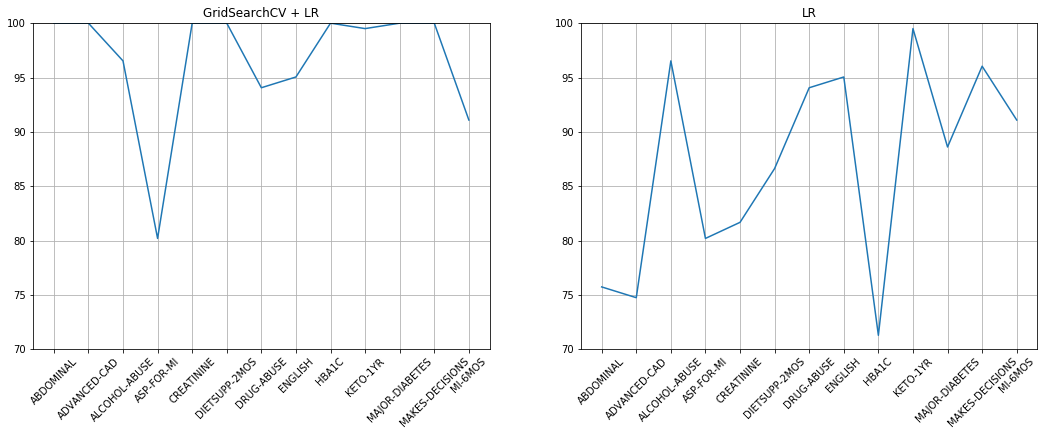

In [106]:
plt.figure(1)
plt.subplot(121)
plt.plot(scores_gs_log)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], tags, rotation=45)
plt.title("GridSearchCV + LR")
plt.ylim((70, 100))
plt.rcParams["figure.figsize"] = [18,6]

plt.subplot(122)
plt.plot(scores_default_log)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], tags, rotation=45)
plt.title("LR")
plt.ylim((70, 100))
plt.rcParams["figure.figsize"] = [18,6]
plt.show

# Extracting data

alcohol-abuse (96.53)

mi-6mos (91.09)

ASP-FOR-MI (80.2)

## ALCOHOL-ABUSE

In [44]:
df.loc[df['ALCOHOL-ABUSE'] == 1]

,id,text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
1,176,Record date: 2085-04-22\n\n \nThis patient wan...,1,0,1,0,0,1,0,1,0,0,0,1,0
31,212,Record date: 2083-07-26\n\n\n\n\n\nINTERNAL ME...,0,1,1,1,1,1,0,1,0,0,1,1,0
35,159,Record date: 2086-10-19\n\n ...,1,1,1,1,0,0,1,1,1,0,1,1,0
75,258,Record date: 2067-08-08\n\nUrgent visit 80 yo ...,0,0,1,0,1,0,0,1,1,0,0,1,0
131,325,Record date: 2078-07-30\n\n\n\nReason for Visi...,0,1,1,1,0,1,1,1,0,0,0,1,0
183,187,Record date: 2114-02-17\n\n \n \n \n ...,1,0,1,1,0,0,0,1,0,0,1,1,0
191,344,Record date: 2099-07-17\n\n ...,0,0,1,0,0,0,0,1,0,0,0,1,0


In [45]:
df.loc[35,['id']]

id    159
Name: 35, dtype: object

keywords:

176: alcohol, alcohol dependence, alcohol intoxication, alcoholic cardiomyopathy

212: alcohol, abuse

159: beer

258: alcohol

325: alcohol, alcohol withdrawal, 

187: binge drinker

344: heavy drinking

### Function for ALCOHOL-ABUSE 
(inaccurate, need to be improved)

In [231]:
key_alcohol = ['alcohol abuse', 'alcohol intoxication', 
            'alcoholic cardiomyopathy', 'alcohol withdrawal',
            'beer', 'binge drinker', 'heavy drinking']
key_alcohol

['alcohol abuse',
 'alcohol intoxication',
 'alcoholic cardiomyopathy',
 'alcohol withdrawal',
 'beer',
 'binge drinker',
 'heavy drinking']

## MI-6MOS

### keywords:
- 214: Myocardial infarction
- 129: 

In [51]:
df.loc[df['MI-6MOS'] == 1]

,id,text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
3,214,Record date: 2096-07-15\n\n\n\nResults01/31/20...,0,1,0,1,0,1,0,0,1,0,0,1,1
46,129,Record date: 2072-10-28\n\nShe's doing much be...,1,1,0,1,1,1,0,1,0,0,1,1,1
56,100,Record date: 2106-02-12\n\nCampbell Orthopedic...,0,1,0,1,0,1,0,1,0,0,1,1,1
60,260,Record date: 2069-03-26\n\n\n\nProblems\n\n\n\...,0,1,0,1,1,1,0,1,1,0,1,1,1
79,106,Record date: 2083-11-17\n\nNORTHWEST IOWA HEAL...,0,1,0,1,0,1,0,1,0,0,0,1,1
82,104,Record date: 2094-02-16\n\nJENNIFER BOOKER\n\n...,0,1,0,0,0,0,0,1,1,0,1,1,1
94,105,"Record date: 2145-08-13\n\nAugust 12, 2145 \n\...",0,1,0,1,1,1,0,1,0,0,1,1,1
96,134,Record date: 2088-01-20\n\n\n\nPCC Internal Me...,0,1,0,1,1,1,0,1,0,0,1,1,1
98,242,Record date: 2070-10-28\n\nID - 67 yo m recent...,0,1,0,1,0,0,0,0,1,0,0,1,1
99,295,Record date: 2078-12-13\n\n \nVascular Surgery...,0,1,0,1,0,1,0,1,0,0,1,1,1


## ASP-FOR-MI

In [52]:
df.loc[df['ASP-FOR-MI'] == 1]

,id,text,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
0,162,Record date: 2068-02-04\n\nASSOCIATED ARTHRITI...,1,1,0,1,0,0,0,1,0,0,0,1,0
2,189,Record date: 2090-07-07\n\nWillow Gardens Care...,0,1,0,1,1,1,0,1,1,0,1,1,0
3,214,Record date: 2096-07-15\n\n\n\nResults01/31/20...,0,1,0,1,0,1,0,0,1,0,0,1,1
4,200,Record date: 2170-02-17\n\n \n\nReason for Vis...,1,0,0,1,0,1,0,1,0,0,1,1,0
5,228,Record date: 2081-05-01\n\n \n \n \n \n \nMay ...,0,1,0,1,0,1,0,1,0,0,0,1,0
6,215,Record date: 2125-07-24\n\nRoutine F/U\n\n\n\n...,0,1,0,1,1,1,1,1,0,0,1,1,0
8,375,Record date: 2154-11-14\n\n\nDepartment of Ort...,1,0,0,1,0,1,0,1,0,0,1,1,0
9,188,Record date: 2066-03-05\n\n\n\n\n\nINTERNAL ME...,0,1,0,1,0,0,0,1,0,0,0,1,0
10,177,Record date: 2070-09-14\n\n9/14/70\n\nIto #152...,1,1,0,1,0,1,0,1,1,0,1,1,0
11,163,Record date: 2083-05-18\n\n\n\n\n\n\n\n\n\n\n\...,1,1,0,1,1,0,0,1,0,0,0,1,0


### keywords:
- 162:
- 189:
- 214: aspirin

### Try to find the correlation 

find the correlation between tags

In [53]:
train_y.corr()

,ABDOMINAL,ADVANCED-CAD,ALCOHOL-ABUSE,ASP-FOR-MI,CREATININE,DIETSUPP-2MOS,DRUG-ABUSE,ENGLISH,HBA1C,KETO-1YR,MAJOR-DIABETES,MAKES-DECISIONS,MI-6MOS
ABDOMINAL,1.000000,-0.118545,0.018485,-0.095980,0.056926,0.121906,-0.024762,-0.055829,-0.033332,0.089869,0.101132,-0.049677,-0.138149
ADVANCED-CAD,-0.118545,1.000000,-0.074214,0.377336,-0.036170,-0.081103,-0.018358,0.008840,-0.031617,0.055360,0.042587,0.154206,0.245481
ALCOHOL-ABUSE,0.018485,-0.074214,1.000000,-0.109613,-0.046386,-0.034597,0.181391,0.043240,-0.018499,-0.013364,-0.049931,0.038475,-0.059260
ASP-FOR-MI,-0.095980,0.377336,-0.109613,1.000000,0.031308,0.119154,0.072325,0.001134,0.007053,0.035049,0.009414,0.090185,0.068211
CREATININE,0.056926,-0.036170,-0.046386,0.031308,1.000000,0.169014,0.090783,0.095707,-0.132710,0.085327,0.408729,0.064485,-0.010860
DIETSUPP-2MOS,0.121906,-0.081103,-0.034597,0.119154,0.169014,1.000000,-0.009961,-0.036634,-0.017399,-0.073386,0.164908,-0.042759,0.057163
DRUG-ABUSE,-0.024762,-0.018358,0.181391,0.072325,0.090783,-0.009961,1.000000,0.057354,0.045362,-0.017726,0.054296,0.051034,-0.078603
ENGLISH,-0.055829,0.008840,0.043240,0.001134,0.095707,-0.036634,0.057354,1.000000,-0.130060,0.016097,0.165216,0.187693,-0.088828
HBA1C,-0.033332,-0.031617,-0.018499,0.007053,-0.132710,-0.017399,0.045362,-0.130060,1.000000,0.100122,-0.010170,0.035231,-0.035810
KETO-1YR,0.089869,0.055360,-0.013364,0.035049,0.085327,-0.073386,-0.017726,0.016097,0.100122,1.000000,0.062598,0.014323,-0.022061


# regular expression match keywords

In [223]:
# stem the keywords
def stemKeywords(keywords):
    stemmedKeys = []
    for key in keywords:
        word = []
        for k in key.split():
            word.append(stemmer.stem(k))
        stemmedKeys.append(' '.join(word))
    return stemmedKeys

In [232]:
key_alcohol = stemKeywords(key_alcohol)
key_alcohol

['alcohol abus',
 'alcohol intox',
 'alcohol cardiomyopathi',
 'alcohol withdraw',
 'beer',
 'bing drinker',
 'heavi drink']

In [235]:
def reKeywords(text, keywords):
    # text must be preprocessed, must be stemmed
    for key in keywords:
        key = re.compile(key)
        if any(key.findall(text)):
            return True
    return False

In [239]:
#find all
index_alcohol = []
for i, t in enumerate(df_train_text):
    if(reKeywords(t, key_alcohol)):
        index_alcohol.append(i)

In [246]:
def findIndex(text,keywords):
    #find indexs that match re keywords
    index = []
    for i, t in enumerate(text):
        if(reKeywords(t, keywords)):
            index.append(i)
    return index

In [248]:
index_alcohol = findIndex(df_train_text, key_alcohol)
len(index_alcohol)

28